In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
df = pd.read_csv('finalout.csv')

In [3]:
df['gross'].max()

760505847.0

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['gross'] = scaler.fit_transform(df['gross'].values.reshape(-1,1))

In [5]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,810,723.0,178,0,855,1245,1000,1.000000,98,...,3054,9,53,7,237000000.0,82,936,7.9,54,33000
1,1,700,302.0,169,563,1000,1962,40000,0.406840,92,...,1238,9,53,7,300000000.0,80,5000,7.1,130,0
2,1,1792,602.0,148,0,161,2210,11000,0.263080,119,...,994,9,52,7,245000000.0,88,393,6.8,130,85000
3,1,333,813.0,164,22000,23000,465,27000,0.589253,269,...,2701,9,53,7,250000000.0,85,23000,8.5,130,164000
4,1,87,462.0,132,475,530,2264,640,0.096066,117,...,738,9,53,7,263700000.0,85,632,6.6,130,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4549,1,1468,35.0,80,0,0,745,0,0.000092,850,...,35,9,39,5,7000.0,78,0,6.3,19,74
4550,1,1726,56.0,81,0,6,2042,121,0.002683,188,...,130,32,53,9,7000.0,65,20,6.9,18,0
4551,1,119,28.0,84,2,2,1261,45,0.091687,672,...,1,9,53,7,3250.0,78,44,7.8,143,4
4552,1,545,14.0,95,0,133,372,296,0.000006,574,...,14,9,53,5,9000.0,84,205,6.4,170,413


In [6]:
#Categorising the target varible 
bins = [ 0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['Worst','Low', 'Medium', 'High','Best']
df['gross_label'] = pd.cut(df['gross'], bins=bins, labels=labels)

Text(0.5, 1.0, 'Categorization Gross')

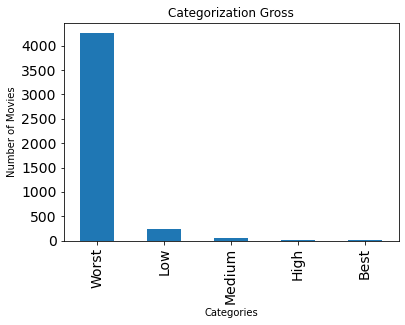

In [7]:
df.groupby(['gross_label']).size().plot(kind="bar",fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Number of Movies')
plt.title('Categorization Gross')

In [8]:
#Label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['gross_label']
df[cat_list]=df[cat_list].apply(lambda x:le.fit_transform(x.astype('str')))

In [9]:
df['gross_label']

0       0
1       3
2       2
3       3
4       4
       ..
4549    4
4550    4
4551    4
4552    4
4553    4
Name: gross_label, Length: 4554, dtype: int32

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
X = df.drop(['gross','gross_label'], axis = 1)
y = df['gross_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [11]:
X_train

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
719,1,2025,171.0,146,12000,451,2078,18000,191,430,...,690,9,53,9,70000000.0,77,992,7.7,130,14000
990,1,409,105.0,109,0,809,2611,49000,550,1471,...,341,9,52,9,55000000.0,75,811,6.4,61,0
3783,1,124,3.0,90,0,37,1237,1000,706,1421,...,18,9,52,9,3440000.0,87,53,3.1,130,606
2142,1,429,190.0,109,453,2000,451,18000,191,951,...,189,9,53,9,20000000.0,81,11000,6.8,130,0
4419,1,1190,26.0,112,2,321,891,786,511,717,...,32,9,53,9,182802463.5,76,633,8.0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1,452,89.0,200,767,382,1473,597,801,917,...,255,9,53,7,11000000.0,38,396,8.0,130,7000
2763,1,1406,71.0,115,187,887,2276,14000,803,1236,...,92,9,52,9,20000000.0,73,900,6.5,130,141
905,1,1606,330.0,112,97,584,531,17000,142,265,...,322,9,53,9,50000000.0,87,920,7.1,130,24000
3980,1,293,77.0,102,32,75,148,483,141,84,...,146,4,19,9,2000000.0,67,147,7.6,130,0


# Logistic Regression

In [12]:
model_logistic=LogisticRegression()  
model_logistic.fit(X_train,y_train)             #Fit logistic regression to train data
lpred = model_logistic.predict(X_test)       #Logistic regression prediction
lpred
lscore = model_logistic.score(X_test, y_test) 
print("Accuracy:",lscore)

Accuracy: 0.9231613611416026


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
model_random = RandomForestClassifier(n_estimators = 200)
model_random.fit(X_train, np.ravel(y_train,order='C'))
rpred = model_random.predict(X_test)
rscore = model_random.score(X_test, y_test) 
print("Accuracy:",accuracy_score(y_test, rpred))

Accuracy: 0.9451152579582875


# Gradient Boosting

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
model_gb = model_gb.fit(X_train,np.ravel(y_train,order='C'))
gpred = model_gb.predict(X_test)
gscore = model_gb.score(X_test, y_test) 
print("Accuracy:",accuracy_score(y_test, gpred))

Accuracy: 0.9418221734357849


# Ada Boosting

In [16]:
from sklearn.ensemble import AdaBoostClassifier
model_ab = AdaBoostClassifier(n_estimators=60)
model_ab=model_ab.fit(X_train,np.ravel(y_train,order='C'))
apred=model_ab.predict(X_test)
ascore = model_ab.score(X_test, y_test) 
print("Accuracy:",accuracy_score(y_test, apred))

Accuracy: 0.9231613611416026


# Decision Tree (GINI)

In [22]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
model_dt.fit(X_train, np.ravel(y_train,order='C'))
dtpred = model_dt.predict(X_test)
dtscore = model_dt.score(X_test, y_test) 
print("Accuracy:",accuracy_score(y_test, dtpred))

Accuracy: 0.9297475301866082


# Decision Tree (ENTROPY)

In [17]:
from sklearn.tree import DecisionTreeClassifier
model_dte = DecisionTreeClassifier(criterion='entropy') #criterion = entopy, gini
model_dte.fit(X_train, np.ravel(y_train,order='C'))
dtepred = model_dte.predict(X_test)
dtescore = model_dte.score(X_test, y_test) 
print("Accuracy:",accuracy_score(y_test, dtepred))

Accuracy: 0.9242590559824369


# Naive bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
model_nb= GaussianNB()
model_nb.fit(X_train, np.ravel(y_train,order='C'))
npred = model_nb.predict(X_test)
nscore = model_nb.score(X_test, y_test) 
print("Accuracy:",accuracy_score(y_test, npred))

Accuracy: 0.8880351262349067


# SVM

In [19]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, np.ravel(y_train,order='C'))
spred = svc.predict(X_test)
sscore = svc.score(X_test, y_test) 
print("Accuracy:",accuracy_score(y_test, spred))

Accuracy: 0.9034028540065862


# KNeighborsClassifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=22)
model_knn.fit(X_train, np.ravel(y_train,order='C'))
kpred = model_knn.predict(X_test)
kscore = model_knn.score(X_test, y_test) 
print("Accuracy:",accuracy_score(y_test, kpred))

Accuracy: 0.9253567508232712


# Comparision Table

In [23]:
output=pd.DataFrame(['Logistic Regression'],columns=['Algorithms'])
output.loc[0,'Accuracy']=lscore
output.loc[1,'Algorithms']='Random Forest'
output.loc[1,'Accuracy']=rscore
output.loc[2,'Algorithms']='Gradient Boosting'
output.loc[2,'Accuracy']=gscore
output.loc[3,'Algorithms']='Ada Boosting'
output.loc[3,'Accuracy']=ascore
output.loc[4,'Algorithms']='Desicion Tree (gini)'
output.loc[4,'Accuracy']=dtscore
output.loc[5,'Algorithms']='Desicion Tree (entropy)'
output.loc[5,'Accuracy']=dtescore
output.loc[6,'Algorithms']='Naive Bayes'
output.loc[6,'Accuracy']=nscore
output.loc[7,'Algorithms']='SVM'
output.loc[7,'Accuracy']=sscore
output.loc[8,'Algorithms']='KNeighborsClassifier'
output.loc[8,'Accuracy']=kscore

In [24]:
output

,Algorithms,Accuracy
0,Logistic Regression,0.923161
1,Random Forest,0.945115
2,Gradient Boosting,0.941822
3,Ada Boosting,0.923161
4,Desicion Tree (gini),0.929748
5,Desicion Tree (entropy),0.924259
6,Naive Bayes,0.888035
7,SVM,0.903403
8,KNeighborsClassifier,0.925357


# Comparision Graph

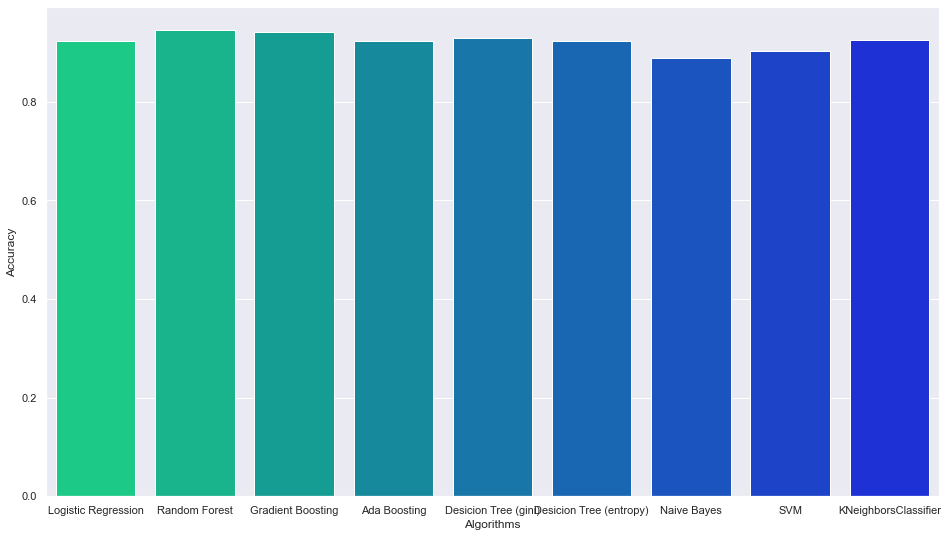

In [25]:
sns.set()
plt.figure(figsize = (16,9))
sns.barplot(x='Algorithms',y='Accuracy',data=output,palette="winter_r")

# Confusion Matrix Of Algorithms

In [26]:
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix,f1_score,recall_score
print('Logistic Regression')
lmatrix = confusion_matrix(y_test, lpred)
print(lmatrix)
print('Random Forest')
rmatrix = confusion_matrix(y_test, rpred)
print(rmatrix)
print('Gradient Boosting')
gmatrix = confusion_matrix(y_test, gpred)
print(gmatrix)
print('Ada Boosting')
amatrix = confusion_matrix(y_test, apred)
print(amatrix)
print('Decision Tree (gini)')
dtmatrix = confusion_matrix(y_test,dtpred)
print(dtmatrix)
print('Decision Tree (entropy)')
dtematrix = confusion_matrix(y_test, dtepred)
print(dtematrix)
print('Naive Bayes')
nmatrix = confusion_matrix(y_test, npred)
print(nmatrix)
print('SVM')
smatrix = confusion_matrix(y_test, spred)
print(smatrix)
print('KNeighbour Classifier')
kmatrix = confusion_matrix(y_test, kpred)
print(kmatrix)

Logistic Regression
[[  0   0   0   1]
 [  0   0   0  58]
 [  0   0   0  11]
 [  0   0   0 841]]
Random Forest
[[  0   1   0   0]
 [  0  18   1  39]
 [  0   5   4   2]
 [  0   2   0 839]]
Gradient Boosting
[[  0   1   0   0   0]
 [  0  24   2  32   0]
 [  0   5   5   1   0]
 [  0  11   0 829   1]
 [  0   0   0   0   0]]
Ada Boosting
[[  0   0   0   1]
 [  0   0   0  58]
 [  0   0   0  11]
 [  0   0   0 841]]
Decision Tree (gini)
[[  0   1   0   0]
 [  0  29   4  25]
 [  0   7   3   1]
 [  0  25   1 815]]
Decision Tree (entropy)
[[  0   0   1   0   0]
 [  0  21   4  33   0]
 [  0   5   4   2   0]
 [  0  21   2 817   1]
 [  0   0   0   0   0]]
Naive Bayes
[[  0   0   1   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0  15   8  35   0]
 [  0   1   4   5   1   0]
 [  0  10  31   7 789   4]
 [  0   0   0   0   0   0]]
SVM
[[  0   0   0   1]
 [  0   9   0  49]
 [  0   6   0   5]
 [  0  27   0 814]]
KNeighbour Classifier
[[  0   0   0   1]
 [  0   1   0  57]
 [  0   0   2   9]
 [  0   0   1 8

# Classification reports Of Algorithms

In [27]:
from sklearn.metrics import classification_report

print('Logistic  Report\n',classification_report(y_test, lpred))
print('Random Forests Report\n',classification_report(y_test, rpred))
print('Gradient Boosting Report',classification_report(y_test, gpred))
print('Ada Boosting Report\n',classification_report(y_test, apred))
print('Decision Tree (Gini) Report\n',classification_report(y_test, dtpred))
print('Decision Tree (Entropy) Report\n',classification_report(y_test, dtepred))
print('Naive Bayes Report\n',classification_report(y_test, npred))
print('SVM Report\n',classification_report(y_test, spred))
print('KNN Report\n',classification_report(y_test, kpred))

Logistic  Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        58
           3       0.00      0.00      0.00        11
           4       0.92      1.00      0.96       841

    accuracy                           0.92       911
   macro avg       0.23      0.25      0.24       911
weighted avg       0.85      0.92      0.89       911

Random Forests Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.69      0.31      0.43        58
           3       0.80      0.36      0.50        11
           4       0.95      1.00      0.98       841

    accuracy                           0.95       911
   macro avg       0.61      0.42      0.48       911
weighted avg       0.93      0.95      0.93       911

Gradient Boosting Report               precision    recall  f1-score   support

         

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
